# TP 2 MEFE - Tomás Di Napoli (INCOMPLETO)

Este trabajo es laresolución del segundo TP computacional de MEFE. Ahora 23:52 del lunes 12 de junio está incompleto (jeje lo dejé un poco para último momento). Pero lo mando para no entregar nada y después lo vuelvo a mandar completo y más prolijo.

**1)** 

Importo las librerías que voy a usar

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as ss
plt.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

Defino los vectores de datos y sus promedios

In [2]:
X = np.arange(2, 3.10, 0.10)
Y = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])
muX = np.mean(X)
muY = np.mean(Y)

Calculo la matriz de covarianza a mano y la comparo con la calculada por numpy:

In [3]:
def cov(x, y):
    var = 0
    for i in range(len(x)):
        var += (x[i] - np.mean(x))*(y[i] - np.mean(y))/(len(x) - 1)
    return var
print("a mano:")
print(f"var(X) = {cov(X, X)}")
print(f"var(Y) = {cov(Y, Y)}")
print(f"cov(X, Y) = {cov(X, Y)}")
print("por numpy:")
print(f"var(X) = {np.cov(X,Y)[0, 0]}")
print(f"var(Y) = {np.cov(X,Y)[1, 1]}")
print(f"cov(X, Y) = {np.cov(X,Y)[0, 1]}")

a mano:
var(X) = 0.11000000000000018
var(Y) = 0.11200000000000007
cov(X, Y) = 0.08790000000000008
por numpy:
var(X) = 0.1100000000000002
var(Y) = 0.11200000000000006
cov(X, Y) = 0.08790000000000009


Ahora para calcular la correlación entre $X$ e $Y$ uso la fórmula

$$\rho^2(X, Y) = \frac{\text{cov}(X, Y)^2}{\text{cov}(X, X) \times \text{cov}(Y, Y)}$$

In [4]:
corr_sq = cov(X, Y)**2/(cov(X, X)*cov(Y,Y))
corr = np.sqrt(corr_sq)
print(f"correlación cuardada: {corr_sq}")
print(f"correlación: {corr}")

correlación cuardada: 0.6271436688311685
correlación: 0.7919240297093961


**2)**

En el sentido de cuadrados mínimos, los parámetros de la recta que mejor ajusta a los datos estan dados por los parámetros que minimizan la suma de los residuos al cuadrado:

$$S = \sum_{i=1}^{N} (y_i - a_2 \times x_i - a_1)^2,$$

donde $N$ es la cnatidad de puntos, $y_i$ son los puntos medidos, $x_i$ son los puntos donde se midió (que se toman como dato) y $a_2$ y $a_1$ los parámetros de la recta.
Para encontrar el vector $\mathbf{A}=(a_1, a_2)$ que cumple ese objetivo se puede derivar y despejar, llegando a la solución exacta

$$\mathbf{A} = (X^T X)^{-1} X^T \mathbf{y},$$

donde $X$ es una matriz de $N \times 2$ con unos en la primera columna y los valores donde se midió en la segunda, e $\mathbf{y}$ es el vector de las mediciones.

Expresando las multiplicaciones de las matrices con el vector $\mathbf{y}$ se llega a que los parámetros son

$$a_1 = \frac{1}{\Delta} \left[\sum_i x_i^2 \sum_i y_i - \sum_i x_i \sum_i y_i x_i \right]$$
$$a_2 = \frac{1}{\Delta} \left[N \sum_i y_i x_i - \sum_i x_i \sum_i y_i \right]$$

con

$$\Delta = N \sum_i x_i^2 - \left(\sum_i x_i\right)^2.$$

Usando la fórmula de propagación de errores para el vector $\mathbf{A}$ tomando como variables aleatorias a las mediciones $y_i$, es decir

$$V_{kl}(\mathbf{A}) = \sum_{i=1}^N \sum_{j=1}^N \frac{\partial a_k}{\partial y_i} \frac{\partial a_l}{y_j} V_{ij}(\mathbf{y}),$$

como $V_{ij} = \delta_{ij} \times \sigma^2$ se llega a la matriz de covarianza de $\mathbf{A}$

$$cov(\mathbf{A}) = \frac{\sigma^2}{\Delta}\left(\begin{matrix}\sum_i x_i^2 & - \sum_i x_i \\- \sum_i x_i & N \\\end{matrix}\right).$$

Ahora que tengo la fórmula para los parámetros y su error los calculo numéricamente:

In [5]:
# Defino variables útiles para luego
N = len(X)
delta = N * np.sum(X**2) - np.sum(X)**2
sigma = 0.3

# Creo la matriz de X que no es más que agregarle una columna de 1's a los datos
Xls = np.array([np.ones(len(X)), X]).T
# Obtengo el vector de parámetros resolviendo la ecuación que escribí antes
A = np.linalg.inv(Xls.T @ Xls) @ Xls.T @ Y.T

# Calculo las varianzas de a1 y a2
sigma1 = np.sqrt(sigma**2/delta * np.sum(X**2))
sigma2 = np.sqrt(sigma**2/delta * N)

print(f"a1 = {A[0]} +- {sigma1}")
print(f"a2 = {A[1]} +- {sigma2}")

a1 = 1.4522727272727227 +- 0.7207950156219546
a2 = 0.7990909090909073 +- 0.28603877677367745


Ahora grafico los datos con su error y la recta que los ajusta.

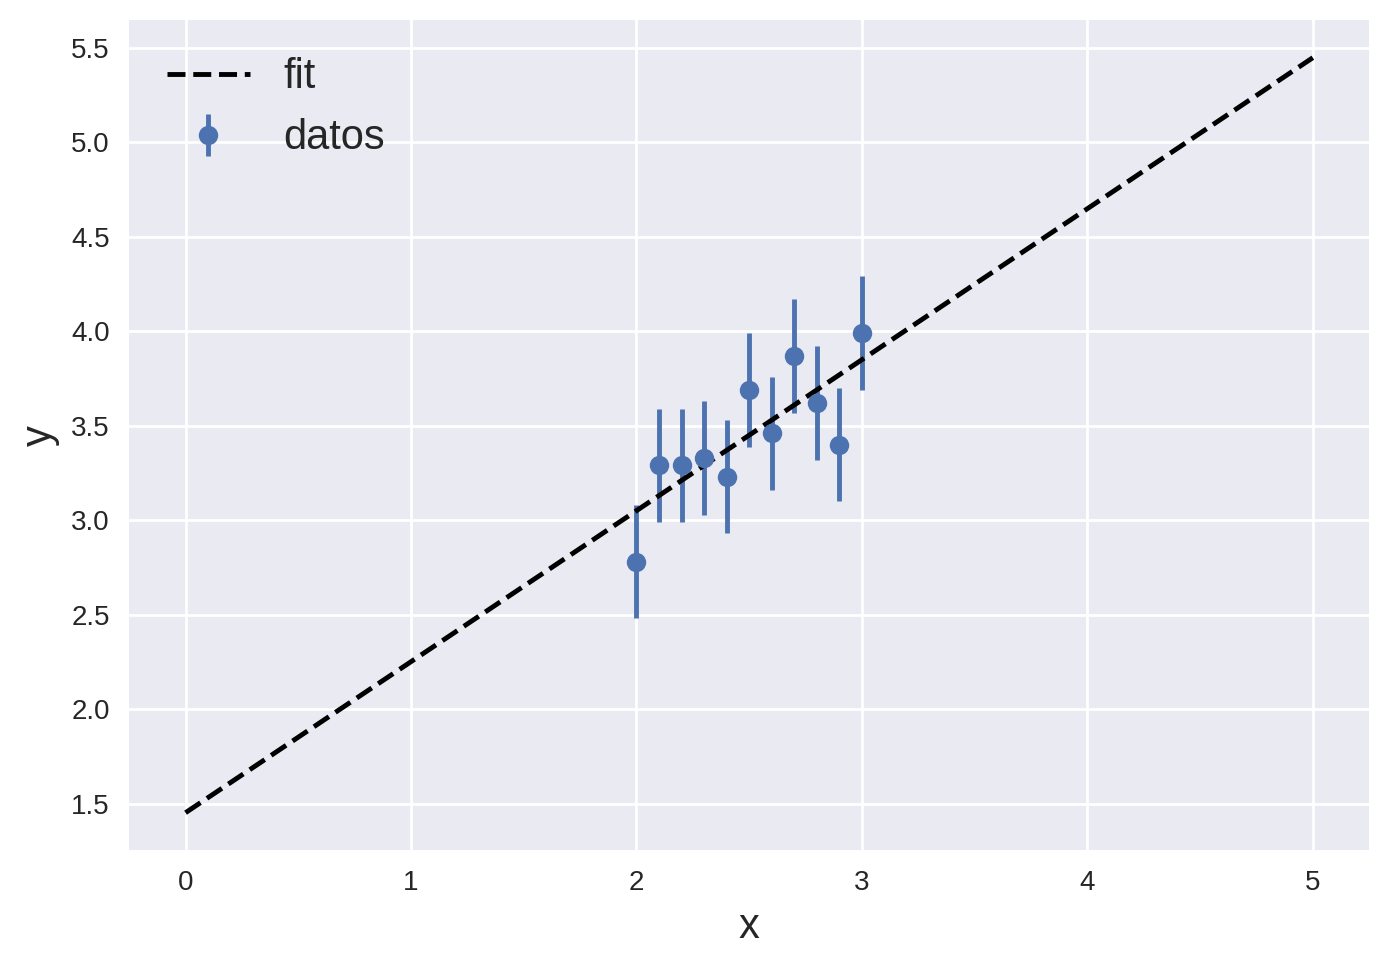

In [6]:
plt.errorbar(X,Y, fmt='o', yerr=0.3, label="datos")
plt.plot([0, 5], np.array([[1,0],[1,5]])@A, label="fit", color="k", linestyle="dashed")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**3)**

Calculo $R^2$ con la fórmula

$$R^2 = 1 - \frac{\sum_i (y_i - a_2 x_i - a_1)^2}{\sum_i (y_i - \mu_y)^2}$$

con $\mu_y$ el promedio de las mediciones $Y$.

In [7]:
Rsq = 1 - np.sum((Y - Xls @ A)**2)/np.sum((Y - np.mean(Y))**2)
print(f"R^2 = {Rsq}")
print(f"Corr^2 = {corr_sq}")

R^2 = 0.6271436688311687
Corr^2 = 0.6271436688311685


Evidentemente el $R^2$ y la correlación al cuadrado son iguales. Esto es así porque para el caso lineal, y encontrando los parámetros $a_1$ y $a_2$ que mejor ajustan a la recta a través de la fórmula de cuadrados mínimos, el $R^2$ y la correlación $\rho^2$ son analíticamente lo mismo. Eso se deduce de reemplazar las fórmulas de $a_1$ y $a_2$ en la fórmula del $R^2$.

**4)**

Ahora que ya se cuales son los parámetros que mejor ajustan a los datos con su error, puedo definir una nueva variable aleatoria que sea la predicción de un valor de $Y$ para un dado valor de $X$(dato). En este caso, la predicción $y_a$ dado $x_a$ es una variable aleatoria en función de las otras dos variables aleatorias $a_1$ y $a_2$. Por lo tanto para conocer el erorr de $y_a$, es decir de la predicción de mi modelo, tengo que volver a usar la fórmula de propagación de errores. Esta vez, usando que

$$y_a = a_1 + a_2 x_a,$$
queda
$$V(y_a) = V_{11} + x_a^2 V_{22} + 2 x_a V_{12}$$

donde los $V_{ij}$ son los elementos de la matriz de covarianza del vector $\mathbf{A}$. Haciendo algunas manipulaciones algebráicas la varianza de $y_a$ queda

$$V(y_a) = \sigma_{y_a}^2 = \frac{\sigma^2}{\Delta} \sum_i (x_a - x_i)^2.$$

Acá el enunciado me dice que "Grafique $y_a(x_a)$", pero esa es la recta que ya grafiqué. Intrepreto que tengo que graficar esa recta $\pm \sigma_{y_a}(x_a)$, entonces para hacer eso primero defino la funcion sigma_ya y la evalúo en algunos valores de $x$ entre 0 y 5:

In [8]:
def sigma_ya(xa, x_data, sigma, delta):
    resultado = 0
    for xi in x_data:
        resultado += sigma**2/delta * (xa - xi)**2
    return np.sqrt(resultado)

# Defino los x del plot
xplot = np.linspace(0, 5, 100)
# Esto es equivalente a evaluar la lineal en los x del plot
yplot = np.array([np.ones(len(xplot)), xplot]).T @ A

# Calculo el error en y para los x del plot
yerr = sigma_ya(xplot, X, sigma, delta)

Ahora grafico

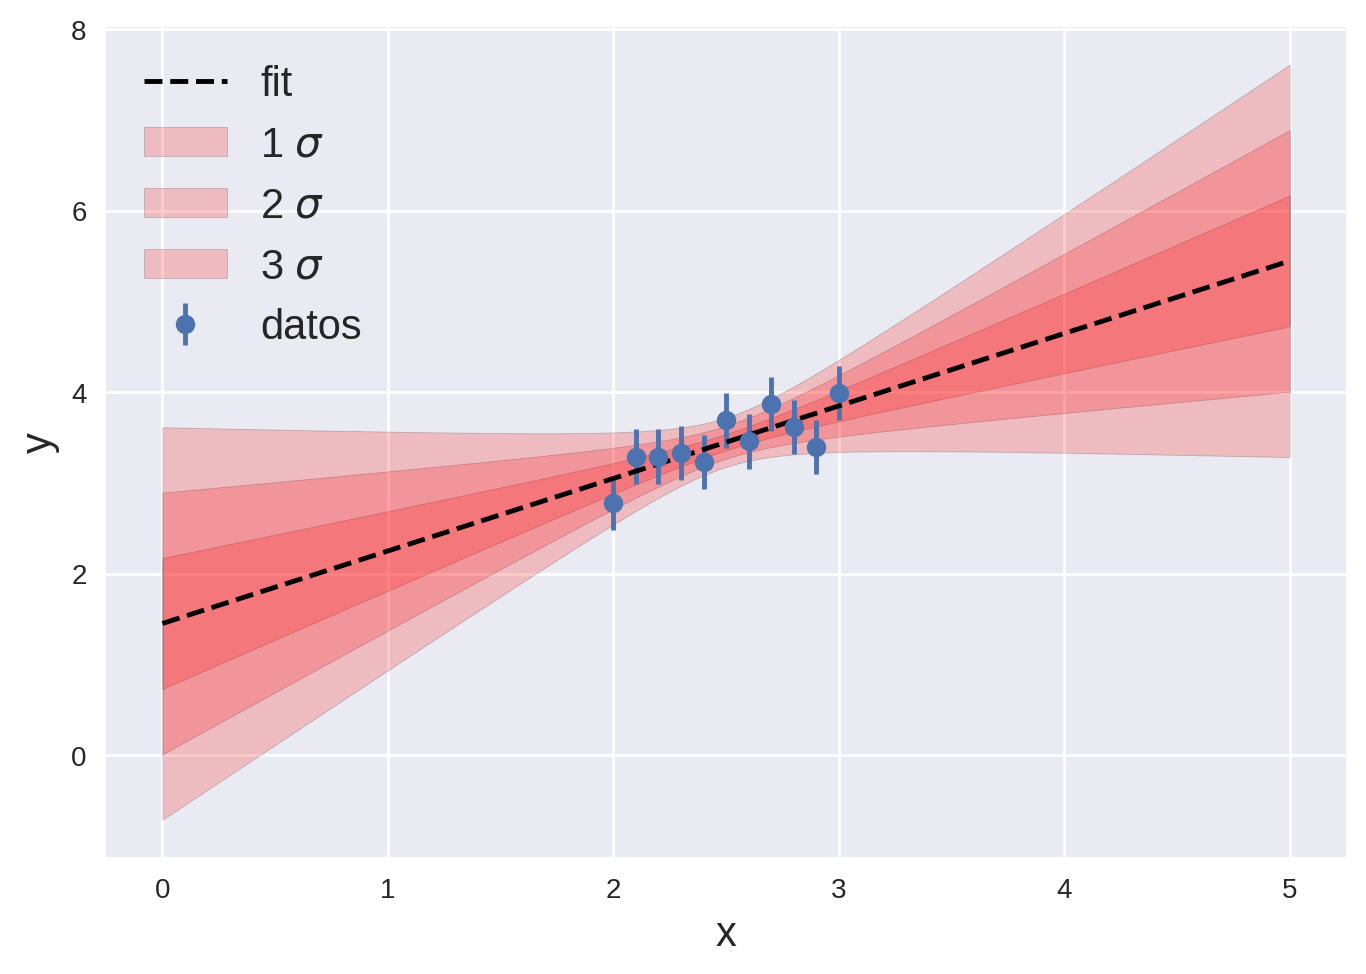

In [9]:
# Ploteo los datos
plt.errorbar(X,Y, fmt='o', yerr=0.3, label="datos")
# Ploteo el fit
plt.plot([0, 5], np.array([[1,0],[1,5]])@A, label="fit", color="k", linestyle="dashed")

# Grafico las bandas de error para +- 1, 2 y 3 sigmas
plt.fill_between(xplot, yplot + yerr, yplot - yerr, color='red', alpha=0.2, label="1 $\sigma$", ec="black")
plt.fill_between(xplot, yplot + 2*yerr, yplot - 2*yerr, color='red', alpha=0.2, label="2 $\sigma$", ec="black")
plt.fill_between(xplot, yplot + 3*yerr, yplot - 3*yerr, color='red', alpha=0.2, label="3 $\sigma$", ec="black")

# Agrego informacion sobre los elementos del plot
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Para encontrar el valor de $x_a$ que minimiza el error puedo derivar la fórmula que deduje arriba e igualarla a 0. Al hacer eso se llega a que 

$$x_a^{\text{optimo}} = \frac{\sum_i x_i}{N},$$

es decir que en el promedio de los $x_i$ nuestra predicción es la que tiene menor error. 

Esto, en conjunto con que el error aumente al alejarse $x_a$ de los datos tiene sentido, porque si por ejemplo nuestras mediciones con $x$ más pequeños salen en promedio más pequeñas de "lo que deberían" y las más grandes salen en promedio más grandes de "lo que deberían", estaríamos estimando que la pendiente es mucho mayor a lo que "realmente es". Eso, cerca de los datos que tomamos no es un problema, pero cuando nos alejemos a $x$ mucho mayores o menores, vamos a estar multiplicando nuestro error en $a_1$ por un $x$ más grande, es decir, el error total es más grande.

**5)**

Si ignorara ese término, la varianza en $y_a$ me queda

$$V(y_a) = V_{11} + x_a^2 V_{22}$$
$$V(y_a) = \frac{\sigma^2}{\Delta} ( \sum_i (x_i^2 + x_a^2) )$$

Hago una función que lo calcula

In [10]:
def sigma_ya_sin_cov(xa, x_data, sigma, delta):
    resultado = 0
    for xi in x_data:
        resultado += sigma**2/delta * (xi**2 + xa**2)
    return np.sqrt(resultado)
# Calculo el error de y sin tener en cuenta la covarianza
ysin = sigma_ya_sin_cov(xplot, X, sigma, delta)

Grafico

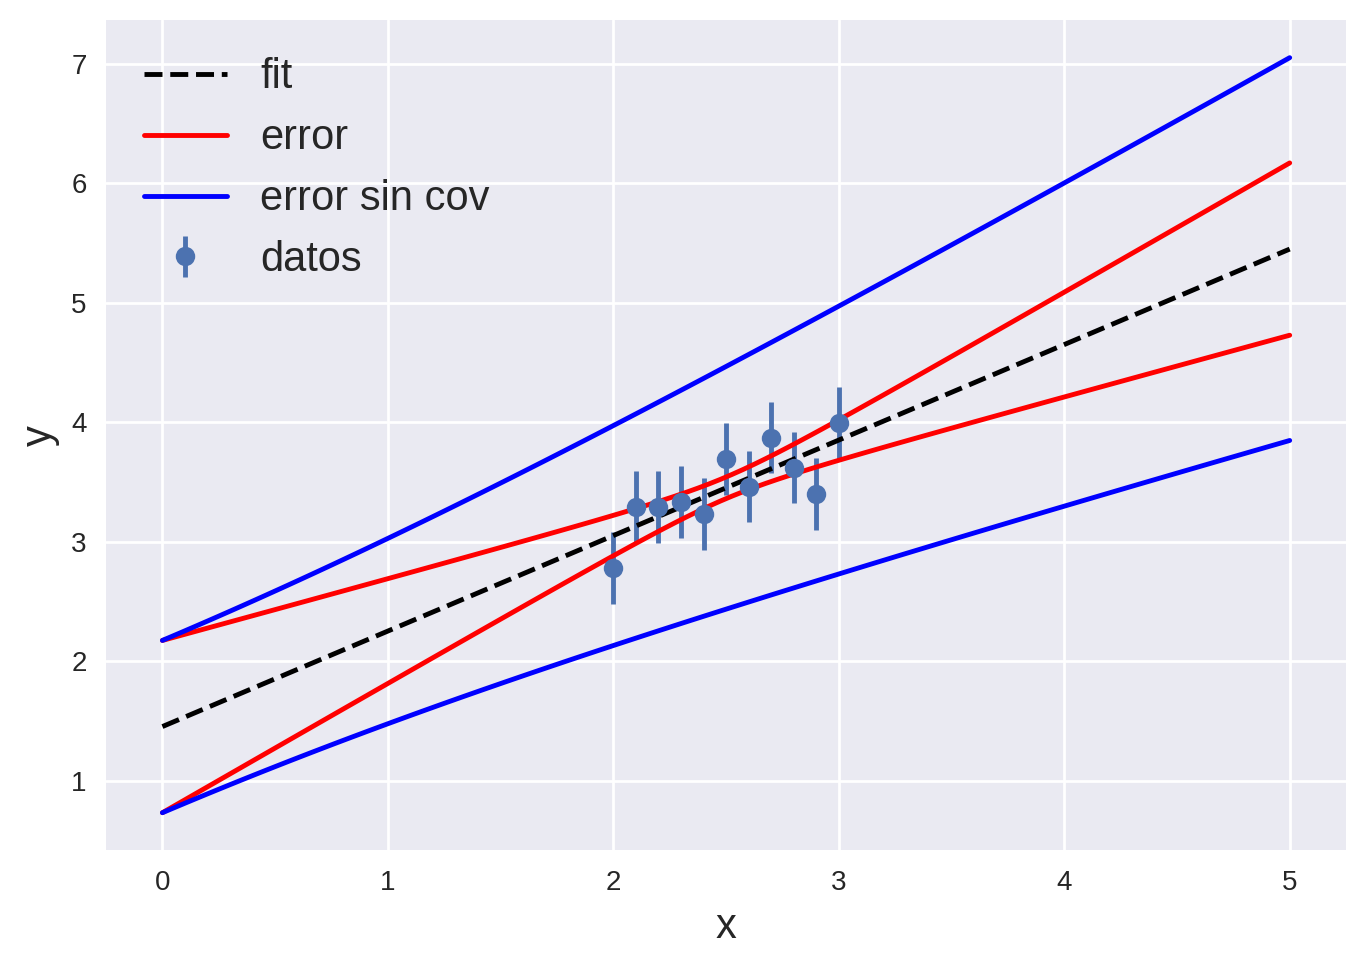

In [11]:
# Grafico los datos
plt.errorbar(X,Y, fmt='o', yerr=0.3, label="datos")

# Grafico el fit
plt.plot([0, 5], np.array([[1,0],[1,5]])@A, label="fit", color="k", linestyle="dashed")

# Grafico las bandas de error correctas
plt.plot(xplot, yplot + yerr, color="r", linestyle="solid", label="error")
plt.plot(xplot, yplot - yerr, color="r", linestyle="solid")

#Grafico las bandas de error sin covarianza
plt.plot(xplot, yplot + ysin, color="blue", linestyle="solid", label="error sin cov")
plt.plot(xplot, yplot - ysin, color="blue", linestyle="solid")

# Agrego información al plot
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Es erronea porque 
1. Sobre-estima el error.
1. Tiene menor error para x menores, cuando eso no tiene por qué ser así.

**6)**

Para resolver este problema invento valores exactos de $a_1 = 0.8$ y $a_2 = 1.5$ y uso el mismo sigma que antes. Hago una función que toma un valor $x_a$ y devuelve una lista de ```reps``` predicciones de $y_a$ generadas a partir del algoritmo detallado en la consigna.
Luego evalúo la función en $x_a = 0.5$, es decir genero una lista de ```reps=1000``` $y_a$ para después crear el histograma.

In [12]:
# Defino los valores exactos de a1 y a2
a1, a2 = 0.8, 1.5
sigma = 0.3
N = len(X)
delta = N * np.sum(X**2) - np.sum(X)**2
reps = 1000
xa = 0.5

def gen_ya(xa):
    # Inicializo el vector de predicciones
    y_a = np.zeros(reps, dtype=float)

    for rep in range(reps):

        # Genero los Y a través de la distribución
        Ygen = np.array([np.random.normal(a1 + a2*x, sigma) for x in X])

        # Obtengo el vector de parámetros resolviendo la ecuación que escribí antes
        A = np.linalg.inv(Xls.T @ Xls) @ Xls.T @ Ygen.T
        
        # Agrego a la lista la predicción
        y_a[rep] = np.array([1, xa]) @ A

    return y_a

y_a = gen_ya(xa)

Ahora hago un histograma con los $y_a$ generados anteriormente. Le asigno el mismo error que en el TP1: asumo que la probabilidad de que uno de los valores caiga en un bin es binomial (o aproximadamente Poisson) y por lo tanto le asigno la desviación estandar de esa distribución como error. 

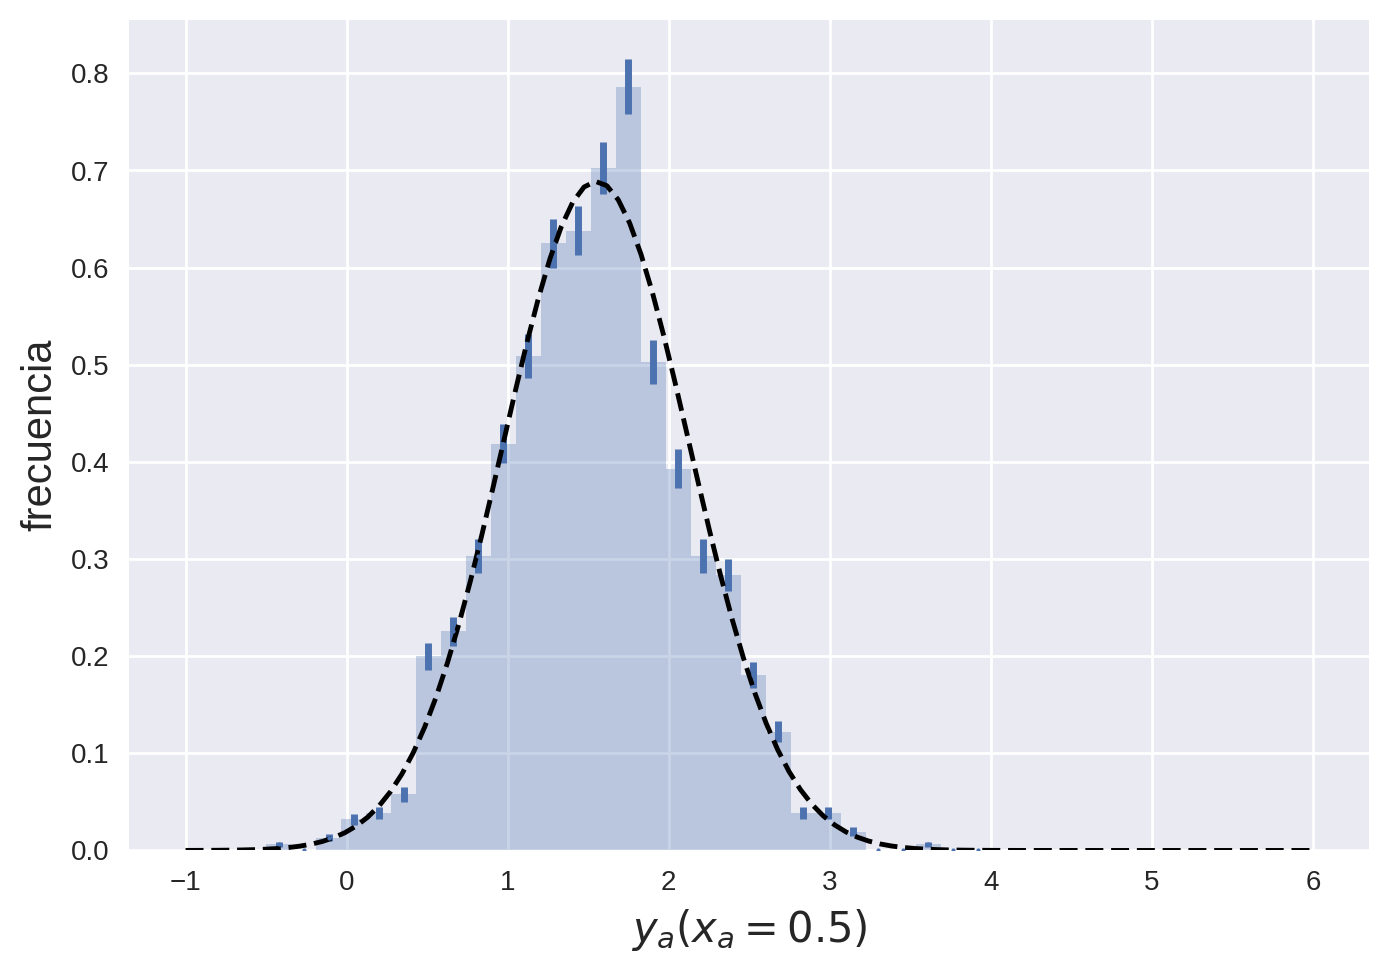

In [13]:
# Genero los bines del histograma
freq, bin_edges = np.histogram(y_a,
                               bins=np.linspace(-0.5, 4, 30),
                             density=True)

# Calculo las barras de error
bin_width = bin_edges[1] - bin_edges[0]
bin_centers = bin_edges[:-1] + bin_width/2
barras_error = np.sqrt(freq)/np.sqrt(len(y_a))

# ploteo el histograma, las barras de error y la gaussiana que los explica teóricamente
xplot = np.linspace(-1, 6, 100)
plt.stairs(freq, bin_edges, fill=True, label="Experimental", alpha=0.3)
plt.errorbar(bin_centers, freq, yerr=barras_error,
             fmt='.', markersize=3, linewidth=2.5, color="C0")
plt.plot(xplot, ss.norm.pdf(xplot, a2*xa + a1, sigma_ya(xa, X, sigma, delta)), color="k", linestyle="dashed")

# Agrego info al plot
plt.xlabel("$y_a(x_a=0.5)$")
plt.ylabel("frecuencia")
plt.show()

Para más diversión hago 1000 predicciones de $y_a$ pero ahora para una lista de $x_a$ distintos $x_a = [0, 1, 2, 3, 4, 5]$. Ploteo de fondo la recta original del problema, usando $a_1 = 0.8$ y $a_2 = 1.5$, junto con sus bandas de error a 1, 2 y 3 $\sigma$. Para cada $x_a$ hago un "violin plot" que consiste en graficar la distribución de los $y_a$ generados, y unas barras que informan el máximo, el mínimo y el promedio de los $y_a$. Al plotear las bandas de error hasta $\pm 3 \sigma$, las distribuciones deberían quedar casi enteras (un $99.7\%$) sobre el color rojo, que es lo que se ve en el gráfico.

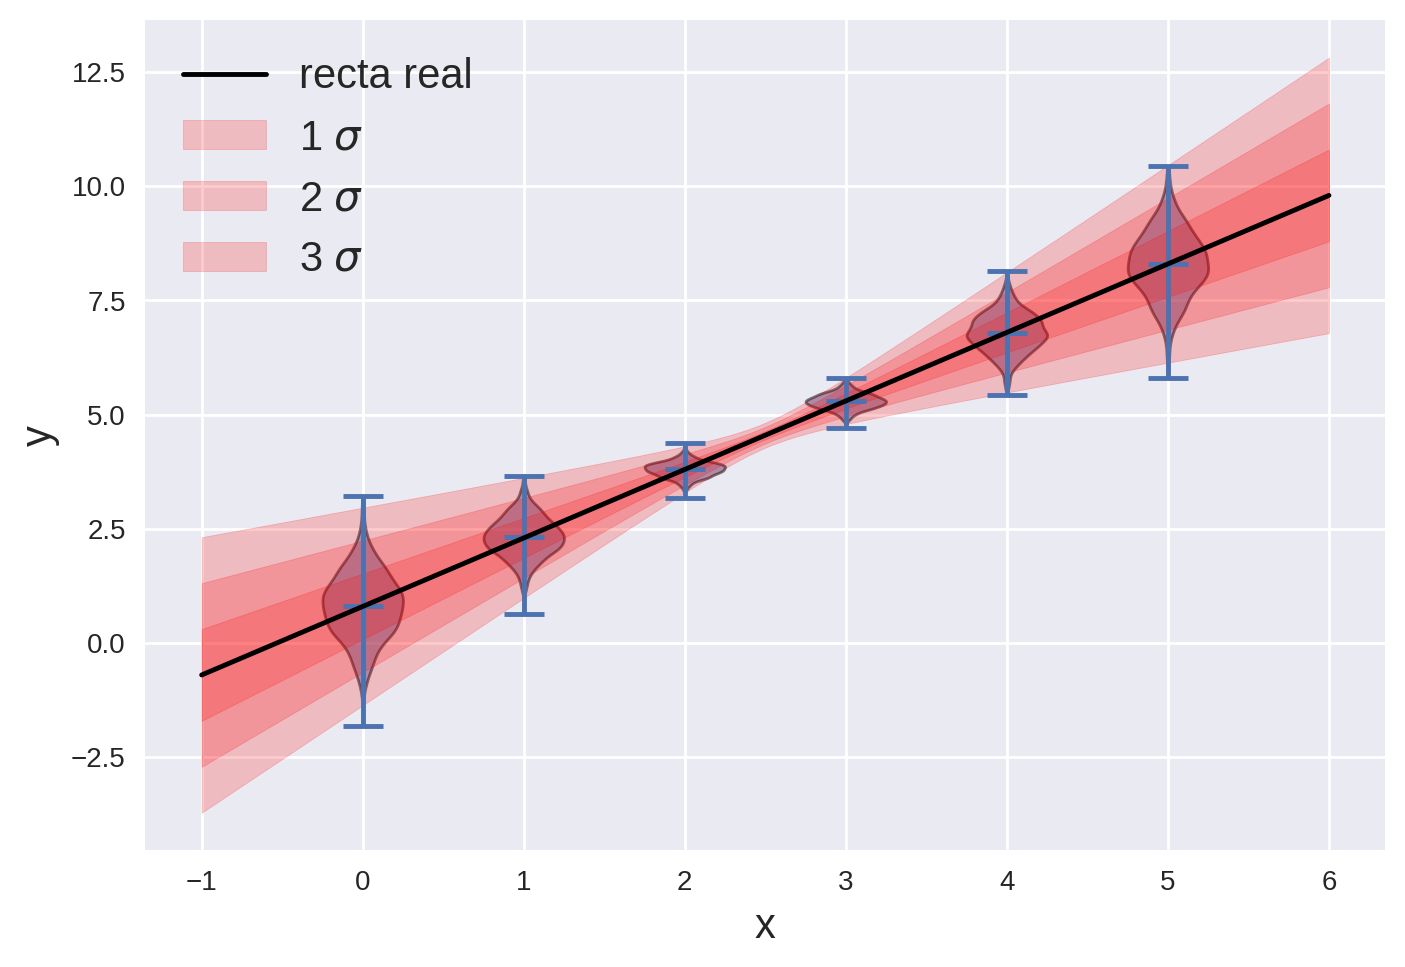

In [14]:
# Genero los xs donde voy a predecir y las listas de ys predichos
xas = np.arange(0, 6, 1)
y_as = [gen_ya(xa) for xa in xas]

fig, ax = plt.subplots()

# Hago los violin plots y configuro su estilo
violins = ax.violinplot(y_as, positions=xas, showmeans=True)
violins['cmeans'].set_color("C0")
violins['cmins'].set_color("C0")
violins['cmaxes'].set_color("C0")
violins['cbars'].set_color("C0")

for body in violins['bodies']:
    body.set_color("C0")
    body.set_facecolor("C0")
    body.set_edgecolor('black')
    body.set_linewidth(1)
    body.set_alpha(0.5)
    
# Calculo los y del plot usando los valores reales de a1 y a2
yplot = np.array([np.ones(len(xplot)), xplot]).T @ np.array([a1, a2])
# Calculo el error en y asumiendo que medí y ajusté en los X originales (que son los q usé para generar los y_a) 
yerr = sigma_ya(xplot, X, sigma, delta)

# Ploteo la recta real y los errores
ax.plot(xplot, yplot, label="recta real", color="k", linestyle="solid")
ax.fill_between(xplot, yplot + yerr, yplot - yerr, color='red', alpha=0.2, label="1 $\sigma$")
ax.fill_between(xplot, yplot + 2*yerr, yplot - 2*yerr, color='red', alpha=0.2, label="2 $\sigma$")
ax.fill_between(xplot, yplot + 3*yerr, yplot - 3*yerr, color='red', alpha=0.2, label="3 $\sigma$")

# Agrego info
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()